# Titanic Shipreck
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
so the objective of this task is to conduct a comprehensive analysis on the dataset and provide a report with respect to factor to contributes to a passenger surviving or not

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('tested.csv')
df.shape

(418, 12)

In [4]:
### 1. Survival Rate:
#### Overall Survival Rate:
overall_survival_rate = df['Survived'].mean() * 100

In [96]:
print(f"the overall survival rate is: {overall_survival_rate:.2f}%")

the overall survival rate is: 36.36%


In [113]:
#### Survival Rate by Gender:

survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
survival_by_gender

Sex
female    100.0
male        0.0
Name: Survived, dtype: float64

In [124]:
df[df["Survived"] ==1]["Pclass"].value_counts()

Pclass
3    72
1    50
2    30
Name: count, dtype: int64

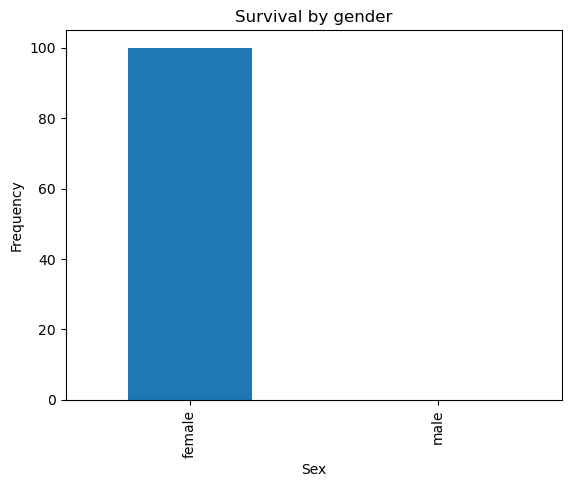

In [126]:
survival_by_gender.plot(kind = 'bar', title = "Survival by gender",
                       ylabel = "Frequency", grid = False);

In [8]:
#### Survival Rate by Class:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
survival_by_class

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

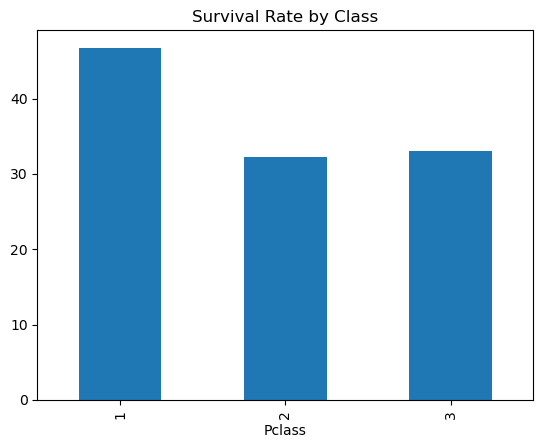

In [99]:
survival_by_class.plot(kind = 'bar')
plt.title("Survival Rate by Class");

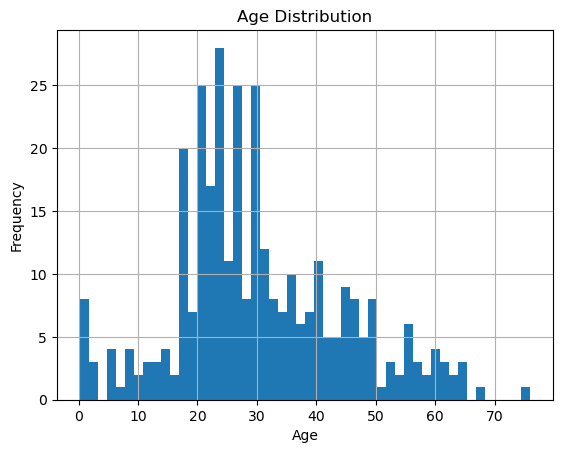

In [127]:
### 2. Age Distribution:
#### Distribution of Ages:
df['Age'].hist(bins=50, grid = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency");

In [139]:
x = [1,2,3,4,5]
y = [0,9,8,7,6,]
for i in zip(y,x):
    print(i)

(0, 1)
(9, 2)
(8, 3)
(7, 4)
(6, 5)


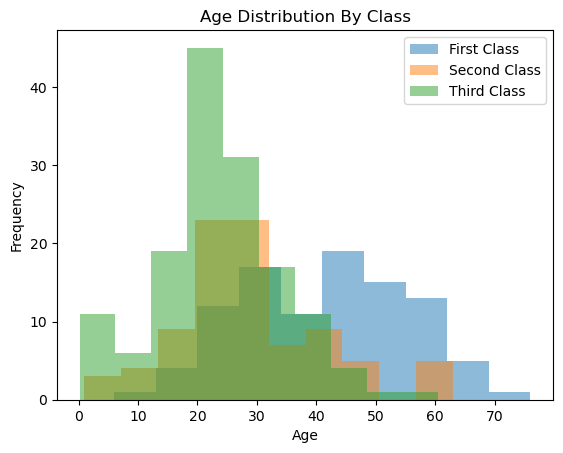

In [130]:
# Grouping data by class and plotting
class_labels = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
for class_val, data in df.groupby('Pclass')['Age']:
    plt.hist(data, alpha=.5, label=class_labels[class_val])

plt.title("Age Distribution By Class")
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.legend()
plt.show()


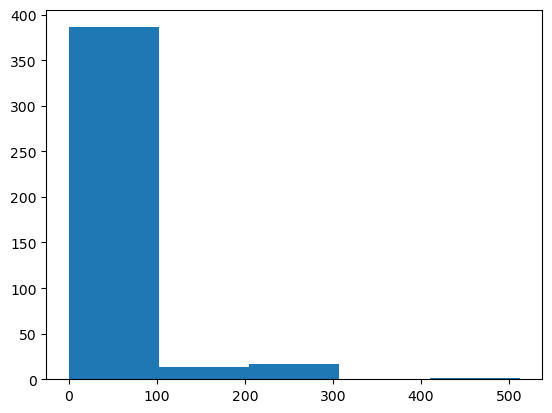

In [141]:
### 3. Fare Distribution:
#### Distribution of Fares:
df['Fare'].hist(bins=5, grid = False);

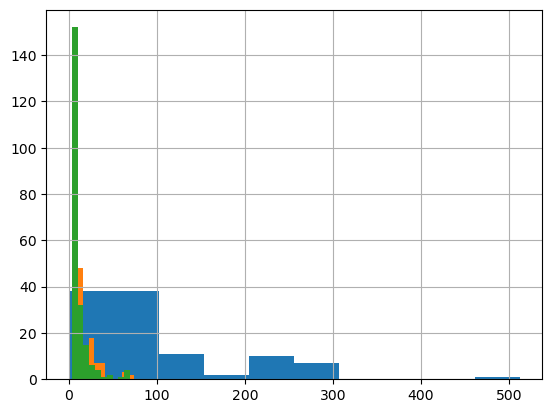

In [103]:
df.groupby('Pclass')['Fare'].hist();

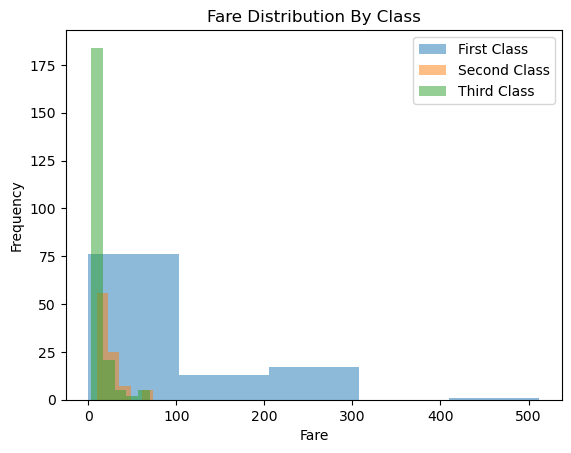

In [166]:
# Grouping data by class and plotting
class_labels = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
for class_val, data in df.groupby('Pclass')['Fare']:
    plt.hist(data, alpha=0.5, bins=5, label=class_labels[class_val])

plt.title("Fare Distribution By Class")
plt.xlabel('Fare')
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [153]:
# df['Family'] = df['SibSp'] + df['Parch']
df.shape[0]

418

In [158]:
### 4. Family Relationships:
#### Proportion of Passengers with Family:
# df['Family'] = df['SibSp'] + df['Parch']
proportion_with_family = (df[df['Family'] > 0].shape[0] / df.shape[0]) * 100
print(f"Proportion of Passengers with Family: {proportion_with_family:.4f}%")

Proportion of Passengers with Family: 39.4737%


In [57]:
#### Survival Rate by Presence of Family:

survival_with_family = df[df['Family'] > 0]['Survived'].mean() * 100
survival_without_family = df[df['Family'] == 0]['Survived'].mean() * 100
print(f"survival rate for people with family:     {survival_with_family:.2f}%")
print(f"survival rate for people without family:  {survival_without_family:.2f}%")

survival rate for people with family:     50.91%
survival rate for people without family:  26.88%


In [26]:
### 5. Embarkation Port:
#### Distribution of Passengers by Port:
passengers_by_port = df['Embarked'].value_counts()
passengers_by_port

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

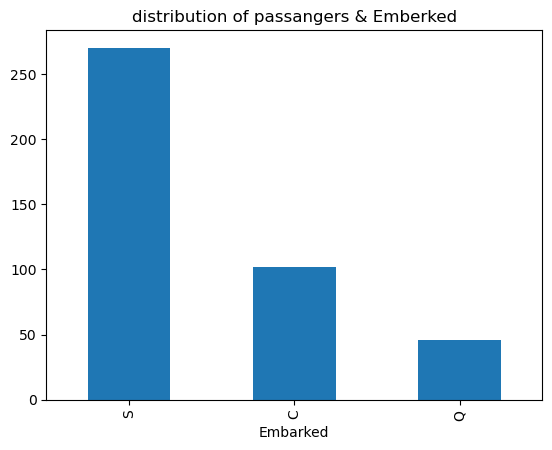

In [60]:
passengers_by_port.plot(kind ='bar')
plt.title("distribution of passangers & Emberked");

In [65]:
#### Correlation between Port and Survival:

port_survival_correlation = df.groupby('Embarked')['Survived'].mean()
port_survival_correlation

Embarked
C    0.392157
Q    0.521739
S    0.325926
Name: Survived, dtype: float64

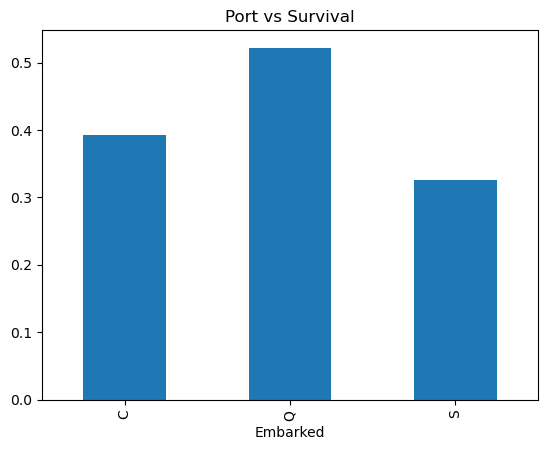

In [62]:
port_survival_correlation.plot(kind = 'bar')
plt.title("Port vs Survival");

In [29]:
### 6. Cabin Class and Survival:
#### Survival Rate by Cabin Class:

survival_by_cabin_class = df.groupby('Pclass')['Survived'].mean() * 100
survival_by_cabin_class

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64

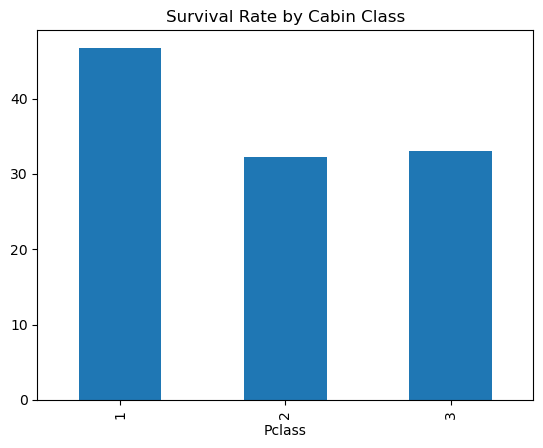

In [66]:
survival_by_cabin_class.plot(kind='bar')
plt.title("Survival Rate by Cabin Class");

#### Correlation between Cabin Location and Survival:

Assuming Cabin information is missing for a significant portion of data
Correlation might not be accurate without complete data

In [30]:
### 7. Name Analysis:
#### Extract Insights from Titles:

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_survival_correlation = df.groupby('Title')['Survived'].mean()
title_survival_correlation

Title
Col       0.0
Dona      1.0
Dr        0.0
Master    0.0
Miss      1.0
Mr        0.0
Mrs       1.0
Ms        1.0
Rev       0.0
Name: Survived, dtype: float64

In [31]:

### 8. Missing Data:
#### Extent of Missing Data:

missing_data = df.isnull().sum()
missing_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family           0
Title            0
dtype: int64

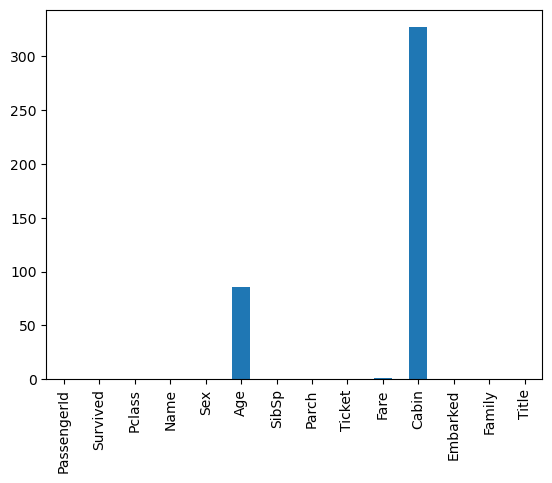

In [68]:
missing_data.plot(kind = 'bar');

#### Handling Missing Data:
- For Age: Imputation using mean/median age or predictive models.
- For Cabin: Consider dropping this feature due to high missingness or use it as a categorical variable (e.g., presence/absence).
- For Embarked: Imputation with the mode value or other meaningful approaches.



In [71]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr


In [70]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Title'],
      dtype='object')

In [76]:
df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: >

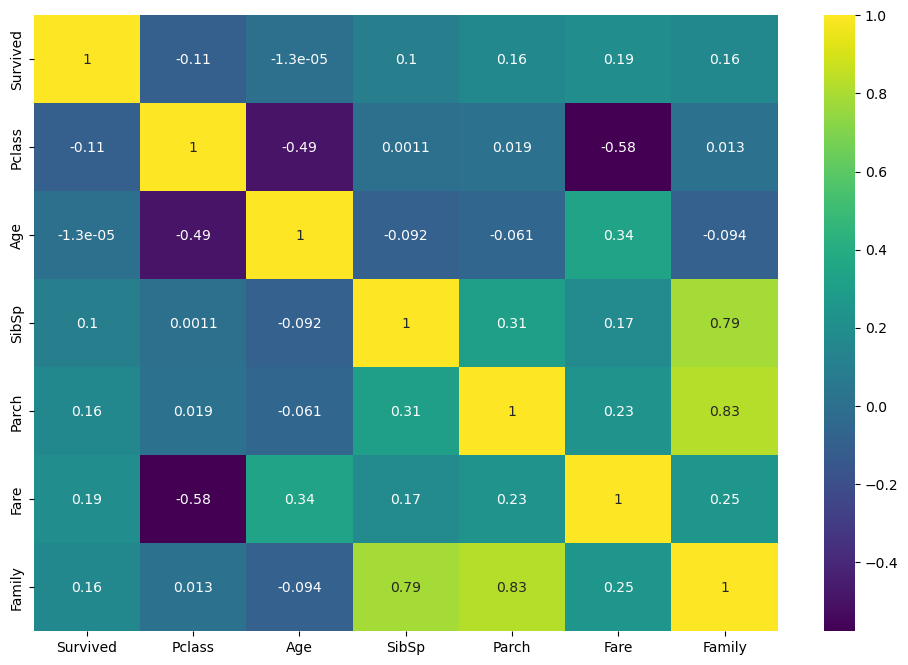

In [86]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Family']].corr(), annot = True, cmap = 'viridis')

In [161]:
#### Strongest Correlations with Survival:
strongest_survival_correlations = df[['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Family']].corr()['Survived'].sort_values(ascending=False)
strongest_survival_correlations

Survived    1.000000
Fare        0.191514
Family      0.161803
Parch       0.159120
SibSp       0.099943
Age        -0.000013
Pclass     -0.108615
Name: Survived, dtype: float64

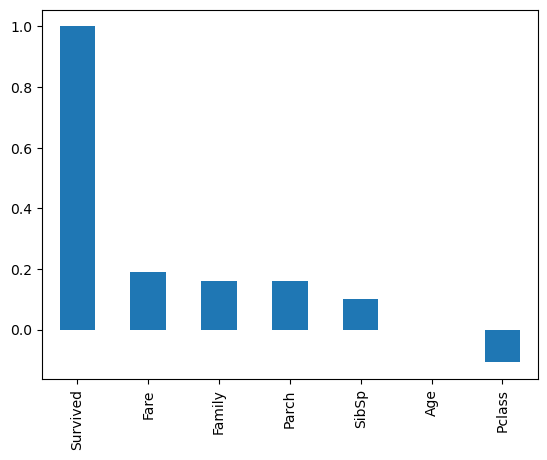

In [163]:
strongest_survival_correlations.plot(kind = "bar");